### Домашнее задание к лекции "Визуализация данных"
#### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.  

Требования к анализу:  

построить не менее 4 визуализаций различных видов;  
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;  
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).  

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [3]:
df = pd.read_csv('googleplaystore.csv')

df['Price'].replace({'\$':''}, regex = True, inplace=True)
df['Price'] = df['Price'].apply(pd.to_numeric, errors='coerce')

df['Size'].replace({'[kKmM]':''}, regex = True, inplace=True)
df['Size'] = df['Size'].apply(pd.to_numeric, errors='coerce')

df['Installs'].replace({'[+,]':''}, regex = True, inplace=True)
df['Installs'] = df['Installs'].apply(pd.to_numeric, errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


<AxesSubplot:title={'center':'Топ 5 Категорий с самыми дорогими приложениями'}, xlabel='Средняя цена приложения', ylabel='Цена'>

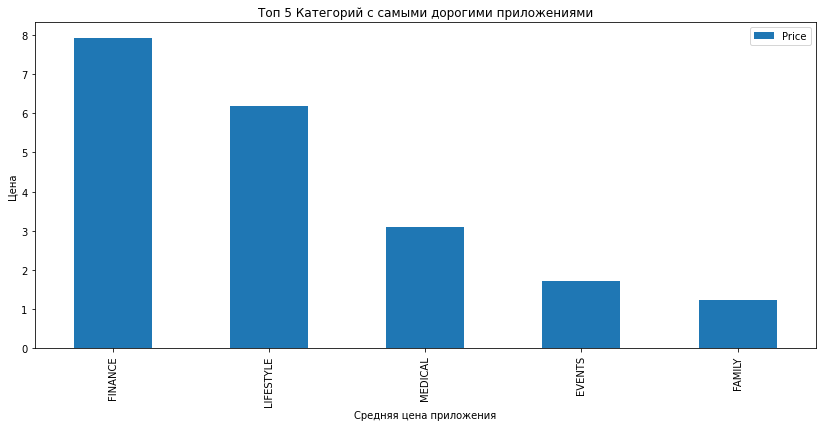

In [50]:
df_category = df[['Price', 'Category', 'Type']]
df_category = df_category[df_category['Type'] == 'Paid']

df_category = df[['Price', 'Category']].groupby('Category').mean('Price').sort_values(by='Price', ascending=False).head(5)
df_category.plot(kind='bar', 
                          title='Топ 5 Категорий с самыми дорогими приложениями',
                          xlabel='Средняя цена приложения',
                          ylabel='Цена')

#### Гипотеза

Можно предположить, что потербители готовы платить больше за финансовые приложения, приложения связанные со здоровьем, красотой и хобби. Что стало причиной повышения цен на приложения данных категорий.

In [51]:
df_rate = df[['Rating', 'Type']]
df_rate_paid = df_rate[df_rate['Type'] == 'Paid']
df_rate_free = df_rate[df_rate['Type'] == 'Free']

<AxesSubplot:title={'center':'Распределение оценок бесплатным играм'}, ylabel='Frequency'>

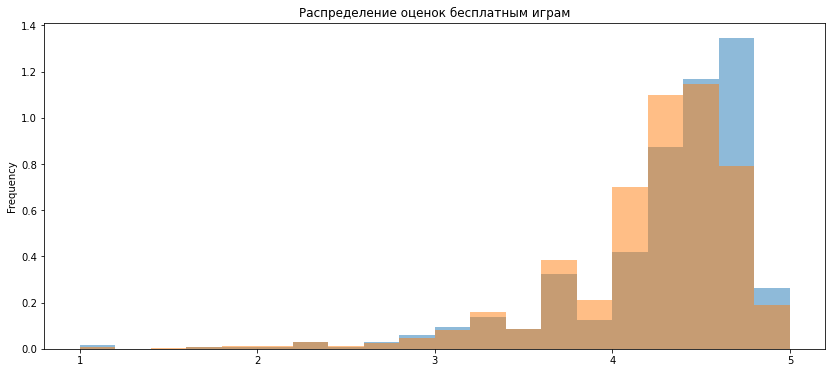

In [52]:
df_rate_paid['Rating'].plot(kind='hist', 
                           bins=20,
                           title='Распределение оценок платным играм',
                           xlabel='Оценка',
                           ylabel='Количество оценок',
                           xticks=range(1, 6),
                           alpha = 0.5,
                           density = True)
df_rate_free['Rating'].plot(kind='hist', 
                           bins=20,
                           title='Распределение оценок бесплатным играм',
                           xlabel='Оценка',
                           ylabel='Количество оценок',
                           xticks=range(1, 6),
                           alpha = 0.5,
                           density = True)

#### Гипотеза:

Платные игры чаще получают наиболее высокие оценки (в диапазоне 4,5-5,0)

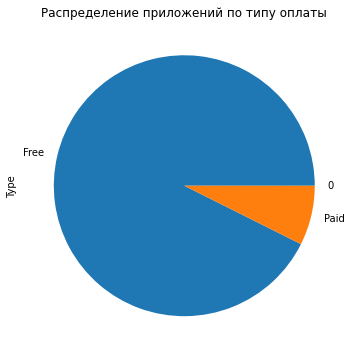

In [54]:
pie_data = df.Type.value_counts().sort_values(ascending = False).head()
ax = pie_data.plot(kind='pie',
                   title='Распределение приложений по типу оплаты')

#### Гипотеза:

Подавляющее большинство приложений не требуют оплаты для установки

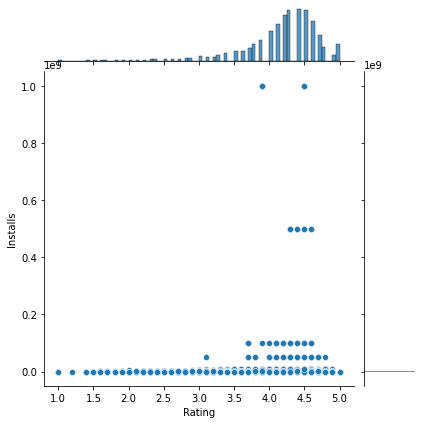

In [55]:
import seaborn as sns
sns.jointplot(x='Rating', y='Installs', 
              data=df.dropna(), kind='scatter')

#### Гипотеза:

Есть зависимость между количеством инсталляций приложений и рейтингом.  
При этом наблюдаются и исключения, требующие анализа - невысокие рейтинги при большом количестве скачиваний